In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows=50
pd.options.display.max_columns=10

from pmdarima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,4)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [3]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\SUBHAJIT\Downloads


In [2]:
data=pd.read_excel("POCM_HISTORICAL.xlsx",engine='openpyxl')

In [3]:
df=data[["Checkout_Date","Order_Quantity"]]
date = data[["Checkout_Date","Order_Quantity"]]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160577 entries, 0 to 160576
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Checkout_Date   160577 non-null  datetime64[ns]
 1   Order_Quantity  160577 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 MB


In [11]:
df['Checkout_Date'].max() - df['Checkout_Date'].min()

Timedelta('528 days 00:00:00')

In [12]:
df['DayOfWeek'] = df['Checkout_Date'].dt.day_name()
print(df['DayOfWeek'])
df['month_name'] = df['Checkout_Date'].dt.month_name()
print(df['month_name'])

0           Tuesday
1           Tuesday
2         Wednesday
3         Wednesday
4         Wednesday
            ...    
160572       Friday
160573       Friday
160574       Friday
160575       Friday
160576       Friday
Name: DayOfWeek, Length: 160577, dtype: object
0         December
1         December
2         December
3         December
4         December
            ...   
160572         May
160573         May
160574         May
160575         May
160576         May
Name: month_name, Length: 160577, dtype: object


In [13]:
df.set_index('Checkout_Date',inplace=True)

In [14]:
df

,Order_Quantity,DayOfWeek,month_name
Checkout_Date,,,
2018-12-04,1,Tuesday,December
2018-12-04,1,Tuesday,December
2018-12-05,5,Wednesday,December
2018-12-05,10,Wednesday,December
2018-12-05,20,Wednesday,December
...,...,...,...
2020-05-15,5,Friday,May
2020-05-15,20,Friday,May
2020-05-15,2,Friday,May


In [15]:
#Understanding Weekly Order Quantity mean
weekly_df=df.resample('W').mean()

In [16]:
weekly_df

,Order_Quantity
Checkout_Date,
2018-12-09,9.408696
2018-12-16,15.907692
2018-12-23,15.570815
2018-12-30,13.138614
2019-01-06,17.648221
...,...
2020-04-19,9.014085
2020-04-26,7.211180
2020-05-03,8.304762


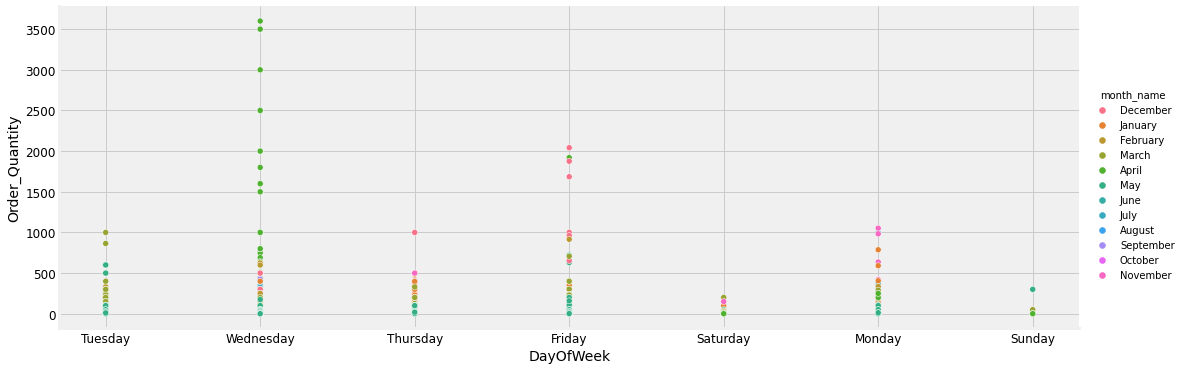

In [17]:
sns.relplot(x="DayOfWeek",y="Order_Quantity",hue="month_name",data=df,height=5,aspect=3)

In [18]:
df.loc[df['Order_Quantity']>2000]

,Order_Quantity,DayOfWeek,month_name
Checkout_Date,,,
2019-04-03,3000,Wednesday,April
2019-04-03,3000,Wednesday,April
2019-04-03,2500,Wednesday,April
2019-04-03,2500,Wednesday,April
2019-04-03,3500,Wednesday,April
2019-04-03,3500,Wednesday,April
2019-04-03,3600,Wednesday,April
2019-12-06,2042,Friday,December


In [19]:
df.head()

,Order_Quantity,DayOfWeek,month_name
Checkout_Date,,,
2018-12-04,1,Tuesday,December
2018-12-04,1,Tuesday,December
2018-12-05,5,Wednesday,December
2018-12-05,10,Wednesday,December
2018-12-05,20,Wednesday,December


In [20]:
df['2020']

,Order_Quantity,DayOfWeek,month_name
Checkout_Date,,,
2020-01-01,12,Wednesday,January
2020-01-01,3,Wednesday,January
2020-01-02,10,Thursday,January
2020-01-02,30,Thursday,January
2020-01-02,12,Thursday,January
...,...,...,...
2020-05-15,5,Friday,May
2020-05-15,20,Friday,May
2020-05-15,2,Friday,May


In [21]:
df['2020-01':'2020-05']['Order_Quantity'].mean()

8.701769268056228

In [5]:
date = date.groupby(["Checkout_Date"])['Order_Quantity'].sum().reset_index()
date.tail()

,Checkout_Date,Order_Quantity
465,2020-05-11,2749
466,2020-05-12,3366
467,2020-05-13,1491
468,2020-05-14,6631
469,2020-05-15,1018


In [23]:
date=date[["Checkout_Date"]]

In [24]:
dummny_dates=pd.date_range(start='2018-12-04',end='2020-05-15')
dummny_dates=dummny_dates.to_frame(index = False)
dummny_dates.columns=["Checkout_Date"]
x = pd.concat([date, dummny_dates])
y = x.drop_duplicates(keep=False, inplace=False)
y['DayOfWeek'] = y['Checkout_Date'].dt.day_name()
y['month_name'] = y['Checkout_Date'].dt.month_name()
holidays=y.reset_index(drop=True)
holidays["DayOfWeek"].unique()

array(['Sunday', 'Saturday', 'Tuesday', 'Thursday'], dtype=object)

In [25]:
holidays

,Checkout_Date,DayOfWeek,month_name
0,2018-12-09,Sunday,December
1,2018-12-16,Sunday,December
2,2018-12-22,Saturday,December
3,2018-12-23,Sunday,December
4,2018-12-25,Tuesday,December
...,...,...,...
54,2020-04-25,Saturday,April
55,2020-05-02,Saturday,May
56,2020-05-03,Sunday,May
57,2020-05-09,Saturday,May


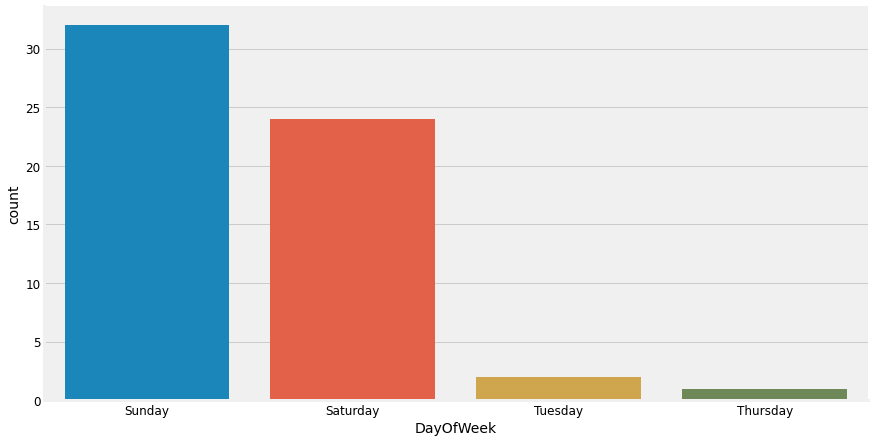

In [26]:
sns.catplot(x = 'DayOfWeek', data = holidays, kind = 'count',height=6,aspect=2)

In [27]:
daily_df = df.groupby(["Checkout_Date","DayOfWeek","month_name"])['Order_Quantity'].sum().reset_index()
daily_df.head()


,Checkout_Date,DayOfWeek,month_name,Order_Quantity
0,2018-12-04,Tuesday,December,2
1,2018-12-05,Wednesday,December,79
2,2018-12-06,Thursday,December,422
3,2018-12-07,Friday,December,468
4,2018-12-08,Saturday,December,111


In [28]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Order_Quantity):
    result=adfuller(Order_Quantity)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [29]:
adfuller_test(daily_df['Order_Quantity'])

ADF Test Statistic : -10.14719787490446
p-value : 8.127120756465995e-18
#Lags Used : 2
Number of Observations Used : 467
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


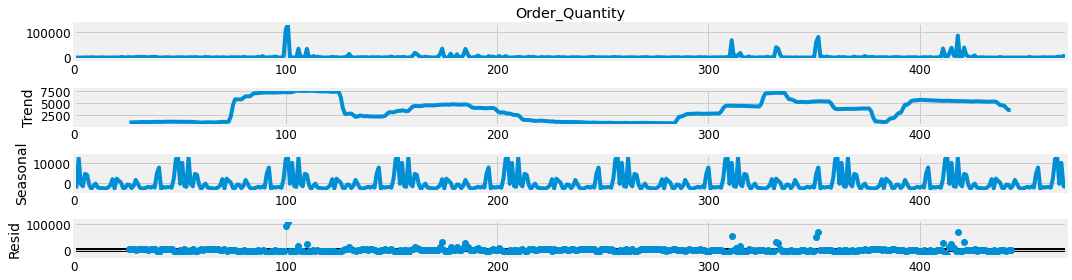

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
final = seasonal_decompose(daily_df['Order_Quantity'],model='additive', freq = 52) # annual=1,Quaterly=4,monthly=12,weekly=52
final.plot();

In [31]:
daily_df=daily_df[["Checkout_Date","Order_Quantity"]]

In [32]:
print(daily_df.shape)
train_size = int(len(daily_df) * 0.80)
train, test = daily_df[0:train_size], daily_df[train_size:]
print(train.shape,test.shape)

(470, 2)
(376, 2) (94, 2)


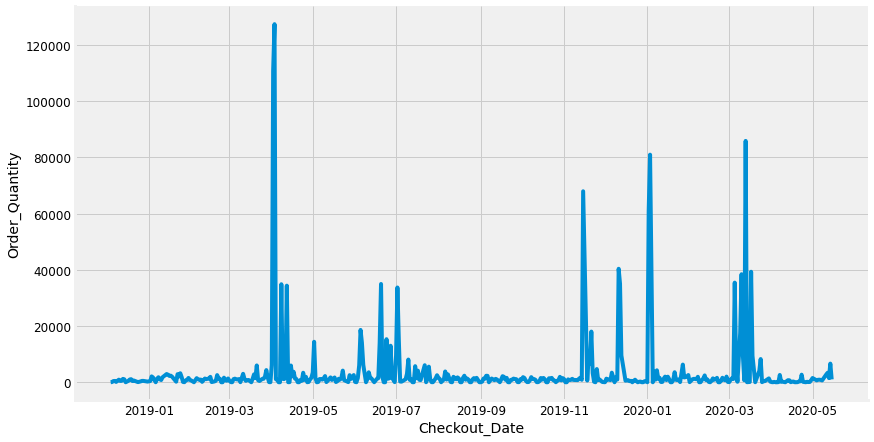

In [33]:
sns.relplot(x = 'Checkout_Date', y = 'Order_Quantity', data = daily_df, kind = 'line',height=6,aspect=2)

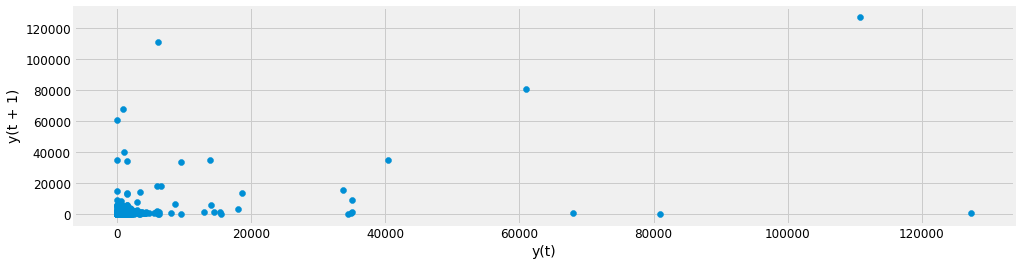

In [34]:
from pandas.plotting import lag_plot
lag_plot(train["Order_Quantity"])
plt.show()

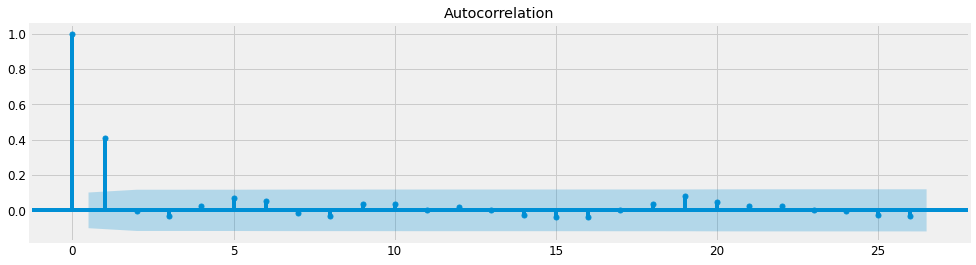

In [35]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(train["Order_Quantity"])
plt.show()

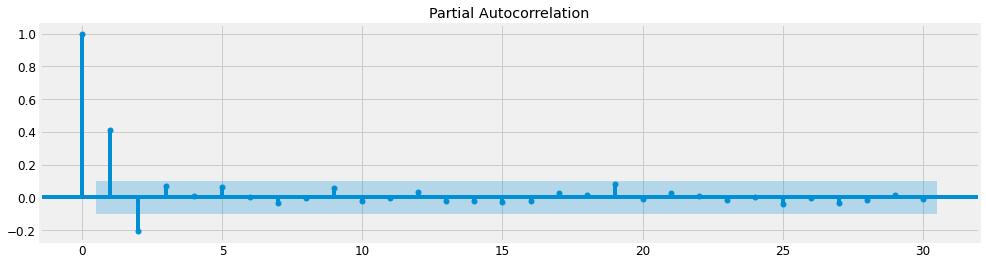

In [36]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(train["Order_Quantity"], lags=30)
plt.show()

In [37]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(train['Order_Quantity'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=8027.429, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=8106.163, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=8039.325, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=8023.686, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=8133.208, Time=0.01 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=8024.974, Time=0.07 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=8024.966, Time=0.06 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=8025.949, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=8036.372, Time=0.03 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0] intercept
Total fit time: 0.806 seconds


In [38]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Order_Quantity'],order=(0,0,1)) #(3,0,2)
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:         Order_Quantity   No. Observations:                  376
Model:                     ARMA(0, 1)   Log Likelihood               -4007.983
Method:                       css-mle   S.D. of innovations          10303.297
Date:                Tue, 04 Jan 2022   AIC                           8021.966
Time:                        21:39:29   BIC                           8033.755
Sample:                             0   HQIC                          8026.646
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 3275.6755    793.034      4.131      0.000    1721.357    4829.994
ma.L1.Order_Quantity     0.4938      0.043     11.391      0.000       0.409       0.579
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -2.0251           +0.0000j            2.0251            0.5000
-----------------------------------------------------------------------------
"""

In [39]:
model.predict()

0      3275.675518
1      1976.045236
2      2381.658477
3      2318.652214
4      2364.278306
          ...     
371    1849.166434
372    2751.183534
373    2404.037529
374    2120.671560
375    5329.529186
Length: 376, dtype: float64

<AxesSubplot:>

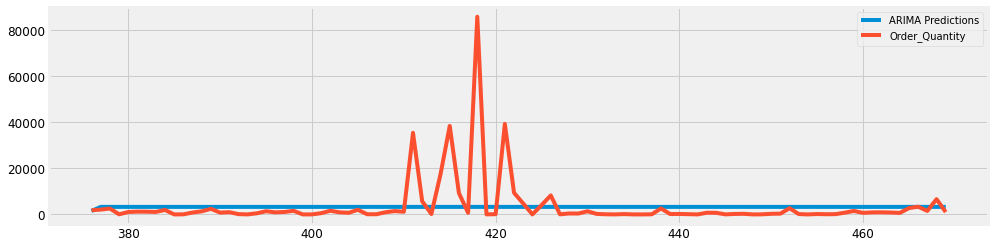

In [40]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end).rename('ARIMA Predictions')
pred.plot(legend=True)
test['Order_Quantity'].plot(legend=True)

In [41]:
daily_df["Order_Quantity"].mean()

3314.923404255319

In [42]:
model2=ARIMA(daily_df['Order_Quantity'],order=(0,0,1))
model2=model2.fit()
test.tail()

,Checkout_Date,Order_Quantity
465,2020-05-11,2749
466,2020-05-12,3366
467,2020-05-13,1491
468,2020-05-14,6631
469,2020-05-15,1018


In [43]:
index_future_dates=pd.date_range(start='2020-05-15',end='2020-05-31')
#print(index_future_dates)
pred=model2.predict(start=len(daily_df),end=len(daily_df)+16).rename('ARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-15    1469.577705
2020-05-16    3314.923404
2020-05-17    3314.923404
2020-05-18    3314.923404
2020-05-19    3314.923404
2020-05-20    3314.923404
2020-05-21    3314.923404
2020-05-22    3314.923404
2020-05-23    3314.923404
2020-05-24    3314.923404
2020-05-25    3314.923404
2020-05-26    3314.923404
2020-05-27    3314.923404
2020-05-28    3314.923404
2020-05-29    3314.923404
2020-05-30    3314.923404
2020-05-31    3314.923404
Freq: D, Name: ARIMA Predictions, dtype: float64


# Daiy Forecast with Seasonality 

In [44]:
from pmdarima.arima import auto_arima
#Autoarima gives us bet model suited for the data
# p - number of autoregressive terms (AR)
# q - Number of moving avergae terms (MA)
# d - number of non-seasonal differences
#p, d, q represent non-seasonal components
#P, D, Q represent seasonal components
arima_model = auto_arima(train['Order_Quantity'], start_p = 1, d=1, start_q = 1, 
                          max_p = 5, max_q = 5, max_d=5, m = 12, 
                          start_P = 0, D=1, start_Q=0, max_P=5, max_D=5, max_Q=5,
                          seasonal = True, 
                          trace = True, 
                          error_action ='ignore',   
                          suppress_warnings = True,  
                          stepwise = True, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.33 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=8139.430, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8041.009, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=8134.286, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8014.238, Time=0.33 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=8004.080, Time=0.92 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=7997.977, Time=2.45 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=7996.702, Time=3.37 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=7987.656, Time=7.41 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=7985.657, Time=4.11 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=7983.733, Time=2.08 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=7981.734, Time=0.66 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=7979.743, Time=0.28 sec
 ARIMA(1,1,0)(0,1,1)[12]     

In [45]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model1=SARIMAX(train['Order_Quantity'],order=(2,1,2),seasonal_order=(0,1,1,12))
results=model1.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                       Order_Quantity   No. Observations:                  376
Model:             SARIMAX(2, 1, 2)x(0, 1, [1], 12)   Log Likelihood               -3933.645
Date:                              Tue, 04 Jan 2022   AIC                           7879.290
Time:                                      21:41:02   BIC                           7902.656
Sample:                                           0   HQIC                          7888.578
                                              - 376                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1948      0.401      0.486      0.627      -0.591       0.980
ar.L2         -0.0961      0.205     -0.468      0.640      -0.498       0.306
ma.L1         -0.6682      0.404     -1.654      0.098      -1.460       0.124
ma.L2         -0.2919      0.404     -0.722      0.470      -1.085       0.501
ma.S.L12      -0.8810      0.076    -11.551      0.000      -1.031      -0.732
sigma2      2.475e+08   3.96e-09   6.25e+16      0.000    2.47e+08    2.47e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21078.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.77   Skew:                             4.49
Prob(H) (two-sided):                  0.14   Kurtosis:                        39.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.05e+32. Standard errors may be unstable.
"""

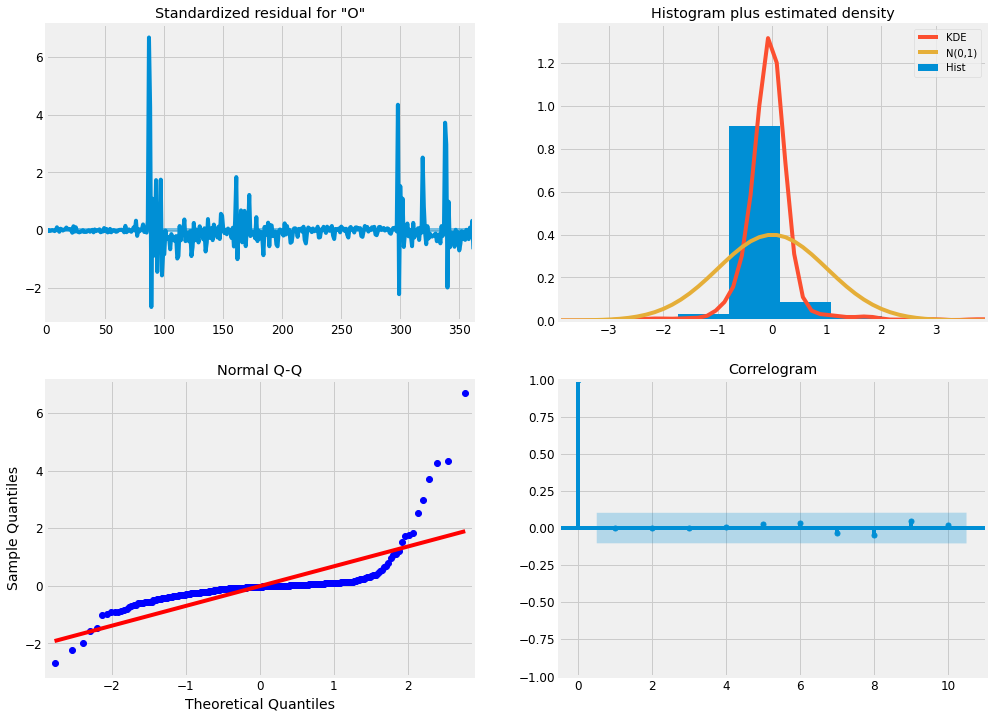

In [46]:
results.plot_diagnostics(figsize=(15, 12)) 
plt.show()

<AxesSubplot:>

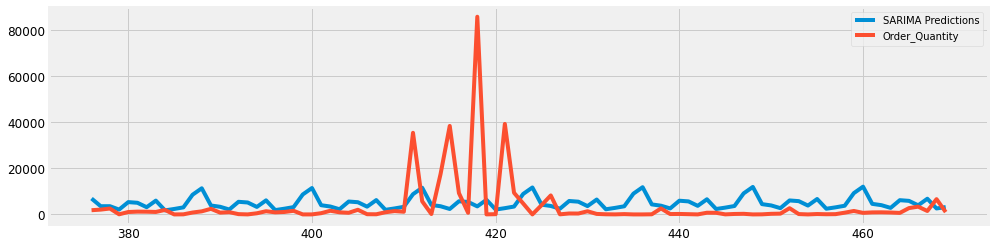

In [47]:
start=len(train)
end=len(train)+len(test)-1
pred=results.predict(start=start,end=end).rename('SARIMA Predictions')
pred.plot(legend=True)
test['Order_Quantity'].plot(legend=True)

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Order_Quantity'].mean()
rmse=sqrt(mean_squared_error(pred,test['Order_Quantity']))
print(rmse)

11558.198902400418


In [49]:
model3=SARIMAX(train['Order_Quantity'],order=(1,1,2),seasonal_order=(5,1,0,12))
model3=model3.fit()

In [50]:
index_future_dates=pd.date_range(start='2020-05-15',end='2020-05-31')
#print(index_future_dates)
pred=model3.predict(start=len(daily_df),end=len(daily_df)+16).rename('SARIMA Predictions')
#print(comp_pred)
pred.index=index_future_dates
print(pred)

2020-05-15     4433.661154
2020-05-16    14778.380038
2020-05-17    20716.981333
2020-05-18     2331.730889
2020-05-19     3171.113979
2020-05-20     2683.278793
2020-05-21     8886.505542
2020-05-22     8254.022905
2020-05-23     3882.750881
2020-05-24     5112.749906
2020-05-25     2506.533346
2020-05-26     2843.581903
2020-05-27     4648.073533
2020-05-28    15292.729398
2020-05-29    21321.610208
2020-05-30     2506.873621
2020-05-31     3349.960029
Freq: D, Name: SARIMA Predictions, dtype: float64
